In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm
import scipy.stats as stats

from data_gen import *

In [2]:
import networkx as nx
import sklearn.tree as tree
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

In [16]:
n = 20
p = 0.15

In [17]:
G = nx.erdos_renyi_graph(n,p)

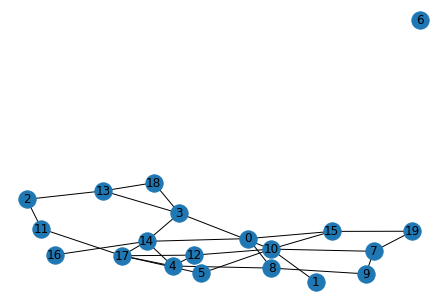

In [18]:
nx.draw(G,with_labels=True)

In [19]:
A = nx.adjacency_matrix(G).todense()

In [20]:
A2 = 1*(np.matmul(A,A)>0)
G2 = nx.from_numpy_array(A2)
A_tri = 1*((A+A2)>1)
G_tri = nx.from_numpy_array(A_tri)

In [21]:
count_tri = np.sum(A_tri,axis=1)
class_membership = 1*(count_tri>0)
class_color = ['#ff7f0e' if class_membership[i]==1 else '#1f77b4' for i in range(n)]

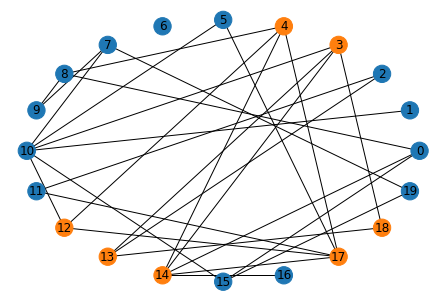

In [22]:
nx.draw(G,with_labels=True,node_color=class_color, pos=nx.shell_layout(G))

In [23]:
def get_first_order_egocentric_graph(A,i,class_color):
    Ai = A[i,:]
    idx = [i]+list(np.where(Ai==1)[1])
    A_ego = A[idx,:][:,idx]
    labels = {i:idx[i] for i in range(len(idx))}
    nx.draw(nx.from_numpy_array(A_ego),with_labels=True,node_color=np.array(class_color)[idx],labels=labels)
    return A_ego

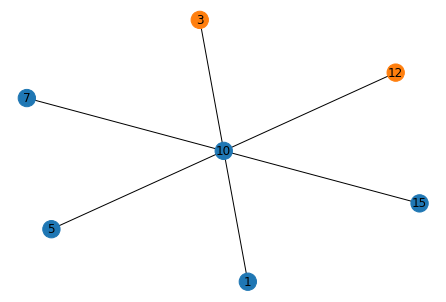

In [24]:
A_ego = get_first_order_egocentric_graph(A,10,class_color)

In [25]:
import itertools
from itertools import combinations, chain
from networkx import isomorphism

def is_correct_iso(G1, G2, v1, v2):
    """checks if there is an isomorphism between G1 and G2 where v1 is mapped to v2"""
    if nx.is_isomorphic(G1, G2):
        GM = isomorphism.GraphMatcher(G1, G2)
        for iso in GM.isomorphisms_iter():
            if iso[v1] == v2:
                return True
    return False

def find_common_graph_structures(G, v1, v2):
    """finds a common subgraph of v1 and v2 (nodes in G). Just over neighbors for now"""
    n = G.size()
    v1_neighbors = G[v1].keys() #G.neighbors(v1)
    v2_neighbors = G[v2].keys() #G.neighbors(v2)
    lim = min(len(list(v1_neighbors)), len(list(v2_neighbors)))
    for s in range(lim,1,-1):
        v1_neighbor_subsets = itertools.combinations(list(v1_neighbors), s)
        v2_neighbor_subsets = itertools.combinations(list(v2_neighbors), s)
        for lst1 in v1_neighbor_subsets:
            for lst2 in v2_neighbor_subsets:
                Pattern1 = G.subgraph([v1]+list(lst1))
                Pattern2 = G.subgraph([v2]+list(lst2))
                if is_correct_iso(Pattern1, Pattern2, v1, v2):
                    return list(Pattern1.nodes), list(Pattern2.nodes)
    return None

def naive_pattern_finder(G, node_lst):
    """iterate over all nodes and find a common pattern for all"""
    node1 = node_lst[0]
#     for node1 in node_lst:
    for node2 in node_lst:
        if node1 != node2:
            if not find_common_graph_structures(G, node1, node2):
                return False
    return True
                    

In [26]:
find_common_graph_structures(G,10,5)

([1, 10, 3], [17, 10, 5])

In [72]:
naive_pattern_finder(G,[3,4,12,13,14,17,18])

False

In [74]:
# adding the node 6 which is not orange colored
naive_pattern_finder(G,[3,4,12,13,14,17,18,10])

False

In [29]:
v1 = 10
v2 = 4
subgraph1 = G.subgraph(list(G[v1].keys())+[v1])
subgraph2 = G.subgraph(list(G[v2].keys())+[v2])
ismags = nx.isomorphism.ISMAGS(subgraph1, subgraph2)
iso_lst = list(ismags.largest_common_subgraph())
iso_lst = [iso for iso in iso_lst if iso[v1] == v2 or iso[v2] == v1] # filter non-relevant isomorphisms
print(iso_lst)

[{1: 8, 10: 4, 3: 12, 7: 14}, {1: 8, 10: 4, 3: 12, 12: 14}, {1: 8, 10: 4, 3: 12, 5: 14}, {1: 8, 10: 4, 3: 12, 15: 14}, {1: 8, 10: 4, 5: 12, 12: 14}, {1: 8, 10: 4, 5: 12, 15: 14}, {1: 8, 10: 4, 5: 12, 7: 14}, {1: 8, 10: 4, 7: 12, 12: 14}, {1: 8, 10: 4, 7: 12, 15: 14}, {1: 8, 10: 4, 12: 12, 15: 14}, {3: 8, 10: 4, 1: 12, 5: 14}, {3: 8, 10: 4, 1: 12, 7: 14}, {3: 8, 10: 4, 1: 12, 12: 14}, {3: 8, 10: 4, 1: 12, 15: 14}, {3: 8, 10: 4, 5: 12, 12: 14}, {3: 8, 10: 4, 5: 12, 15: 14}, {3: 8, 10: 4, 5: 12, 7: 14}, {3: 8, 10: 4, 7: 12, 12: 14}, {3: 8, 10: 4, 7: 12, 15: 14}, {3: 8, 10: 4, 12: 12, 15: 14}, {5: 8, 10: 4, 1: 12, 3: 14}, {5: 8, 10: 4, 1: 12, 7: 14}, {5: 8, 10: 4, 1: 12, 12: 14}, {5: 8, 10: 4, 1: 12, 15: 14}, {5: 8, 10: 4, 3: 12, 7: 14}, {5: 8, 10: 4, 3: 12, 12: 14}, {5: 8, 10: 4, 3: 12, 15: 14}, {5: 8, 10: 4, 7: 12, 12: 14}, {5: 8, 10: 4, 7: 12, 15: 14}, {5: 8, 10: 4, 12: 12, 15: 14}, {7: 8, 10: 4, 1: 12, 3: 14}, {7: 8, 10: 4, 1: 12, 5: 14}, {7: 8, 10: 4, 1: 12, 12: 14}, {7: 8, 10: 4, 1: 

In [177]:
def recursive_pattern_finder_mem(G, cur_pattern, v_p, node_lst):
    d = []
    recursive_pattern_finder(G, cur_pattern, v_p, node_lst, d)
    return d[-1]

def recursive_pattern_finder(G, cur_pattern, v_p, node_lst, d):
    """finds a the largest common subgraph of node list in G using the ISMAGS algorithm
    with a recursive approach. Just over neighbors for now"""
    if node_lst == []:
        d.append(cur_pattern)
    else:
        v = node_lst[0]
        subgraph = G.subgraph(list(G[v].keys())+[v])
        ismags = nx.isomorphism.ISMAGS(subgraph, cur_pattern)
        iso_lst = list(ismags.largest_common_subgraph())
        iso_lst = [iso for iso in iso_lst if (v in iso and iso[v] == v_p) or (v_p in iso and iso[v_p] == v)] # filter non-relevant isomorphisms
        for f in iso_lst:
            recursive_pattern_finder(G, G.subgraph(list(f.keys())), v, node_lst[1:], d)

In [178]:
v1 = 3
pattern = G.subgraph(list(G[v1].keys())+[v1])
# recursive_pattern_finder(G, pattern, v1, [4,12,13,14,17,18])
# recursive_pattern_finder(G, pattern, v1, [4])[0].nodes
recursive_pattern_finder_mem(G, pattern, v1, [4,12,13,14,17,18]).edges

EdgeView([(18, 3), (18, 13), (3, 13)])

In [168]:
import random

def sample_nodes(node_lst, percentage):
    """generate random sample of node_lst of size percentage of size of the node_lst"""
    k = len(node_lst) * percentage // 100
    indicies = random.sample(range(len(node_lst)), k)
    return [node_lst[i] for i in indicies]

In [158]:
lst = [3,4,12,13,14,17,18]
sample_nodes(lst, 90)

[14, 17, 4, 3, 18, 13]

In [179]:
def sample_pattern_finder(node_lst, percentage):
    sample = sample_nodes(node_lst, percentage)
    sample.sort()
    v1 = sample[0]
    pattern = G.subgraph(list(G[v1].keys())+[v1])
    res = recursive_pattern_finder_mem(G, pattern, v1, sample[1:])
    return res

In [180]:
sample_pattern_finder([3,4,12,13,14,17,18], 90).edges

EdgeView([(18, 3), (18, 13), (3, 13)])

## Algorithm 1

INPUT
1. Conditional direct effect (CDE) for each unit $i$: $\tau_i = E[ Y_i(1,t_{-i}) - Y_i(0,t_{-i}) | W = w_i ]$ where $w_i = \phi( x_i, \{ x_j | a_{i,j} = 1\}, \{ t_j | a_{i,j} = 1\}, a_{i,\cdot} )$
2. Features hypothesized as effect modifiers: $U = X \cup \Delta$ where $\Delta$ is a set of interpretable network features e.g. triangles, v's etc.

ASSUMPTION
1. $\tau_i$ is influenced by their own covariates $x_i$, neighbors' covariates $x_j$ and the network neighborhood structure $a_{i,\cdot}$
2. $Y_i(1,t_{-i})$ and $Y_i(0,t_{-i})$ are independent of $T_i$ given $x_i, \{ x_j | a_{i,j} = 1\}, \{ t_j | a_{i,j} = 1\}, a_{i,\cdot}$
3. $Y_i(1,t_{-i})$ and $Y_i(0,t_{-i})$ are independent of $T_i$ given $W=w_i$

OUTPUT
1. $P(\tau_i > \tau | U = u_i)$

ALGORITHM
1. For each unit $i$, derive $u_i$
2. Estimate boundary for $\tau_i > \tau$ for a given $\tau$ using $U$'s


In [76]:
def contains(G,H,j):
    ## is H contained in G?
    ## This is where we innovate by doing pattern matching ##
    ## Correction: check that the central node is mapped to some node in the pattern ##
    
    try:
        A = nx.from_pandas_adjacency(G)
    except:
        A = nx.from_numpy_array(G)
    
    print(A.nodes())
    GM = nx.algorithms.isomorphism.GraphMatcher(A,H)
    is_isomorphic = int(GM.subgraph_is_isomorphic())
    
    if is_isomorphic:
        GM_1 = nx.algorithms.isomorphism.ISMAGS(H,A)
        iso_lst = list(GM_1.largest_common_subgraph())
        for iso in iso_lst:
            if (j in iso) and (len(iso)==len(H.keys())):
                if (iso[j] == 0):
                    return 1
    return 0

def get_first_order_egocentric_graph(G,i):
    A = G.to_numpy()
    Ai = A[i,:]
#     print(np.where(Ai==1)[0])
    idx = [i]+list(np.where(Ai==1)[0])
    A_ego = A[idx,:][:,idx]
    return A_ego

def get_x_u(V,X):
    return V[X]

def get_delta_u(G,Delta,Delta_col):
    df = pd.DataFrame()
    for i in G.index:
        Gi = get_first_order_egocentric_graph(G,i)
        u_i = pd.DataFrame(np.array([ contains(Gi,delta[0],delta[1]) for delta in Delta]).reshape(1,-1),index=[i],columns=Delta_col)
        df = df.append(u_i)
    return df

def get_u(G,V,X,Delta,Delta_col):
    df_delta = get_delta_u(G,Delta,Delta_col)
    df_x = get_x_u(V,X)
    df = df_x.join(df_delta)
    return df

def fit(U,tau):
#     tau1 = (tau>tau0).astype(int) # 1[tau>tau0]
    X_train, X_test, y_train, y_test = train_test_split(U, tau, test_size=0.5, random_state=42)
    model = tree.DecisionTreeClassifier().fit(X_train,y_train)
    print(model.score(X_test,y_test))
    return model#, model.predict_proba(U,tau)
    

In [ ]:
n = 100
p = 0.5
age = np.random.randint(20,70,size=n)
gender = np.random.binomial(1,0.5,size=n)
V = pd.DataFrame()
V['Age'] = age
V['Gender'] = gender
G = nx.to_pandas_adjacency(nx.erdos_renyi_graph(n,p))

X = ['Age','Gender']
Delta = [(nx.star_graph(3),0),(nx.complete_graph(4),0)]
Delta_col = ['3-star','Clique-4']

U = get_u(G,V,X,Delta,Delta_col)
tau = ((age>50)*(U['Clique-4']==1)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [73]:
A = nx.star_graph(3)
list(A.nodes())

[0, 1, 2, 3]

In [63]:
tau

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Clique-4, Length: 100, dtype: bool

0.98


[Text(279.0, 271.8, 'gini = 0.0\nsamples = 50\nvalue = 50.0')]

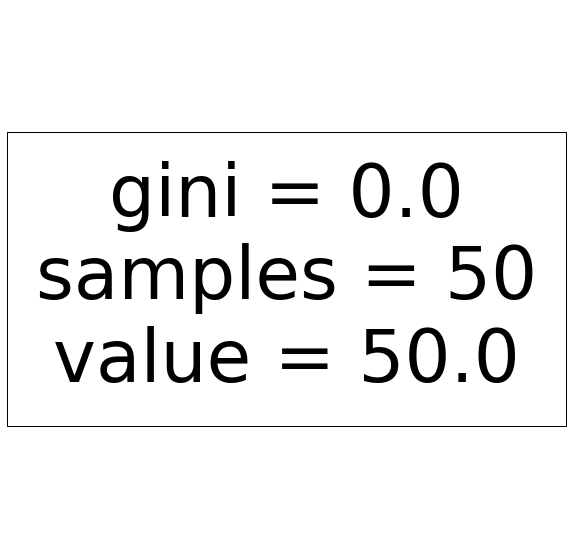

In [64]:
model = fit(U,tau.astype(int))
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=U.columns,filled=True)